### **In this notebook we're going to learn how to write neural networks for classification problems**

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [2]:
# Import TensorFlow
import tensorflow as tf

### **Create data to view and fit**

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples = n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now...let's visualize it!

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


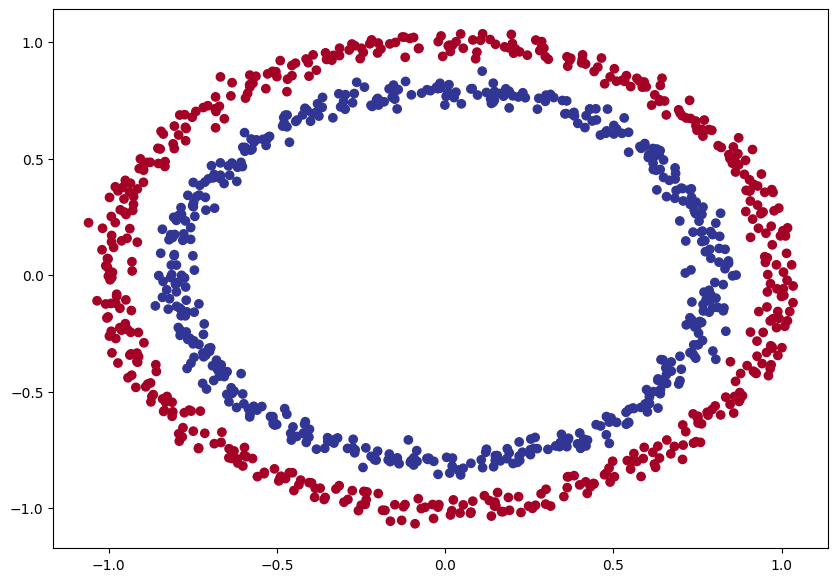

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### **Input and output shapes**

In [8]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Steps in modeling**

The steps in modelling with TensorFlow are typically:
1. Create a model
2. Compile a model
3. Fit a model
4. Evaluate the model
5. Tweak
6. Evaluate
7. ...

In [11]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']) # what percentage of our examples did the model get right?

# 3. Fit a model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 869us/step - loss: 1.8378 - accuracy: 0.5230
Epoch 2/5
32/32 [==============================] - 0s 870us/step - loss: 0.7200 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 869us/step - loss: 0.7036 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 789us/step - loss: 0.6972 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 838us/step - loss: 0.6949 - accuracy: 0.4960


In [12]:
# Let's try and improve our model by training it for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 799us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy...it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile a modle
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit a model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 740us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933069229125977, 0.5]

### **Improving our model**

Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model**
    * add more layers
    * increase the number of hidden units
    * change the activation functions
2. **Compile a model**
    * choose a different optimization function (Adam/SGD)
    * change the learning rate
3. **Fit a model**
    * fitting on more date
    * fitting for longer

In [15]:
tf.random.set_seed(42)

# 1. Build a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100), # add another layer with 100 neurons
    tf.keras.layers.Dense(10), # add 10 dense neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit a model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 832us/step - loss: 0.6992 - accuracy: 0.5090


[0.6992132663726807, 0.5090000033378601]

To visualize our model's predictions let's create a function `plot_decision_boundry()`  
This function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgridof the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundry(model, X, y):
    '''
    Plots the decision bounday create by a model predicting on X.
    This function was inspired by two resources:
        1. cs231n
        2. MadeWithMl
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stach 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing multiclass classification')
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundry
    plt.figure(figsize=(10,7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 912us/step
Doing binary classification


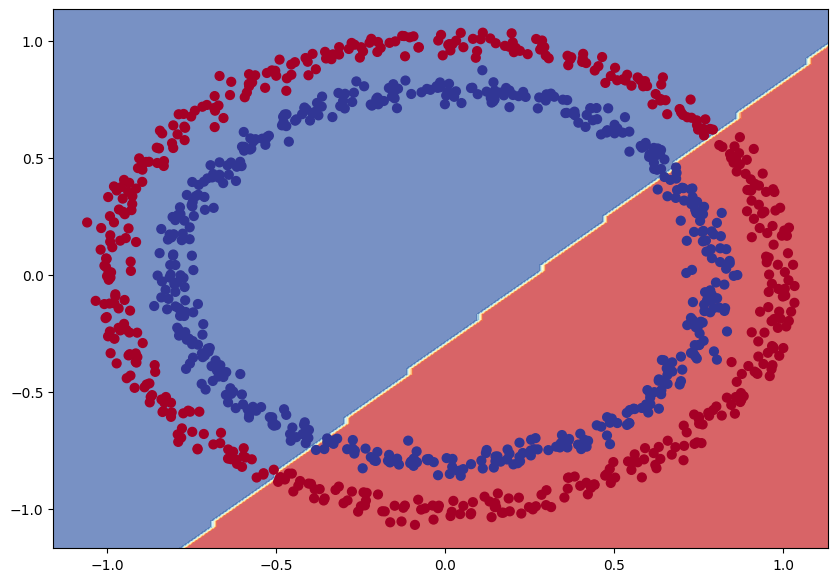

In [18]:
# Check out the predictions our model is making
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [19]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 10

# Split our regression data into training and test set
X_reg_train = tf.reshape(X_regression[:150], shape=(150,1))
X_reg_test = tf.reshape(X_regression[150:], shape=(50,1))
y_reg_train = tf.reshape(y_regression[:150], shape=(150,1))
y_reg_test = tf.reshape(y_regression[150:], shape=(50,1))

# Fit our model to the regression data
## model_3.fit(X_reg_train, y_reg_train, epochs=100)
# It returns an error, because loss is set to BinaryCrossentropy and data is not adequate to it

In [20]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit a model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 331.5494 - mae: 331.5494
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 197.7132 - mae: 197.7132
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 73.9390 - mae: 73.9390
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.2264 - mae: 73.2264
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 81.5738 - mae: 81.5738
Epoch 6/100
5/5 [==============================] - 0s 997us/step - loss: 51.3501 - mae: 51.3501
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 49.1953 - mae: 49.1953
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 43.1386 - mae: 43.1386
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 46.4098 - mae: 46.4098
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 43.4073 - mae: 43.4073
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 997us/step


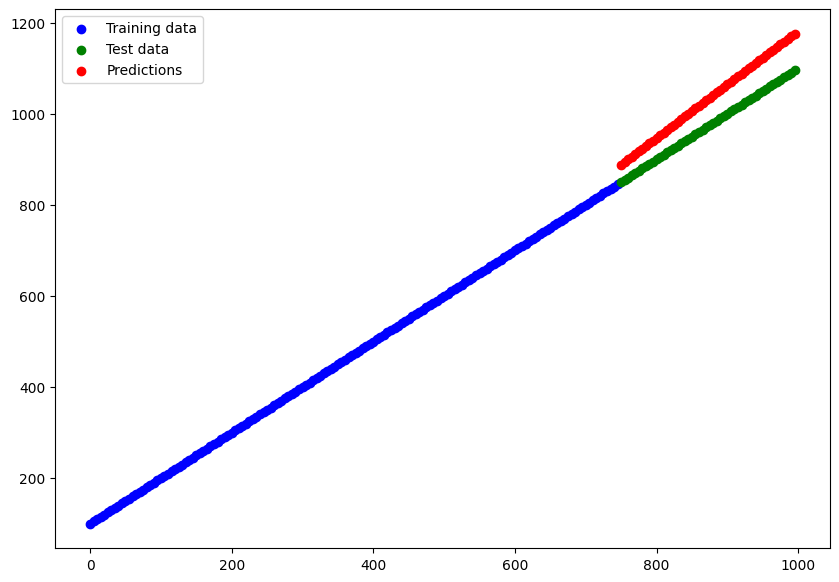

In [21]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

### **The missing piece: Non-linearity**

In [22]:
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 933us/step - loss: 5.9055 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 901us/step - loss: 5.8906 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 965us/step - loss: 5.8798 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 943us/step - loss: 5.8667 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 835us/step - loss: 5.8651 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 772us/step - loss: 5.8321 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 708us/step - loss: 5.7957 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 772us/step - loss: 5.7835 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 814us/step - loss: 5.7818 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 836us/step - loss: 5.7808 - accura

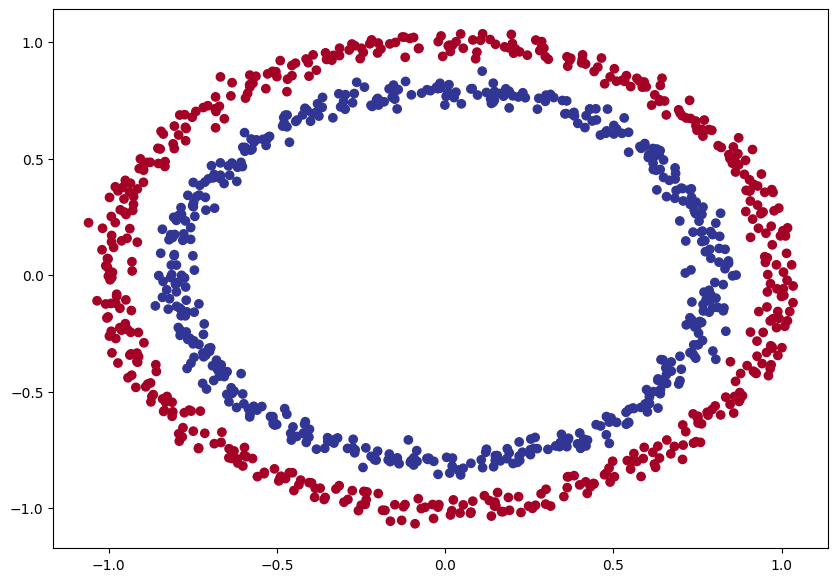

In [23]:
# Check out our data
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 608us/step
Doing binary classification


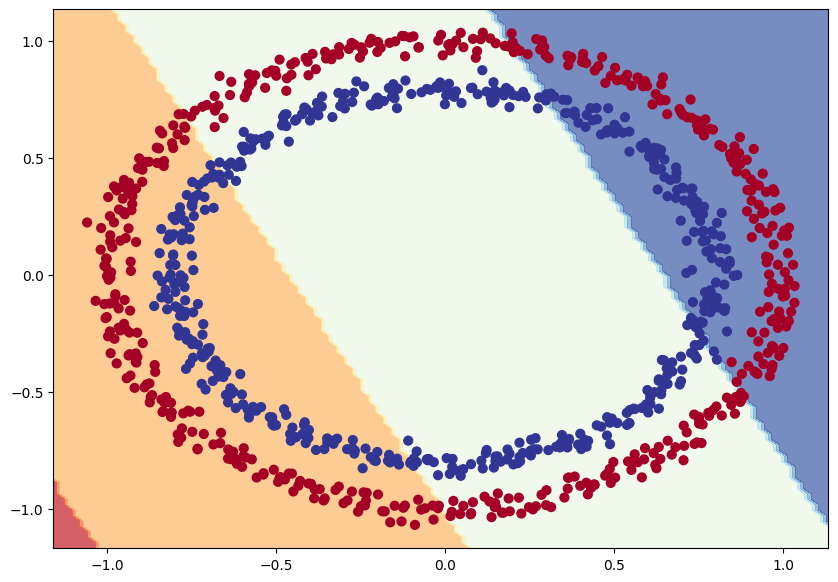

In [24]:
# Check the decision boundary for our mode
plot_decision_boundry(model=model_5,
                      X=X,
                      y=y)

Let's try and build our fist model with non-linear activation function

In [25]:
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile a model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9900 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9817 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9645 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9822 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9612 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9534 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9642 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9638 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9637 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 804us/step - loss: 5.9636 - accuracy: 0.4910
Epoch 1

In [26]:
# Time to replicate the multi-layer neural network for TensorFlow playground in code

tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 901us/step - loss: 3.6539 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 804us/step - loss: 3.4131 - accuracy: 0.4940
Epoch 3/250
32/32 [==============================] - 0s 979us/step - loss: 3.1691 - accuracy: 0.4290
Epoch 4/250
32/32 [==============================] - 0s 962us/step - loss: 2.8891 - accuracy: 0.4380
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.7234 - accuracy: 0.4570
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.4712 - accuracy: 0.4600
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 2.4010 - accuracy: 0.4560
Epoch 8/250
32/32 [==============================] - 0s 904us/step - loss: 2.3859 - accuracy: 0.4560
Epoch 9/250
32/32 [==============================] - 0s 852us/step - loss: 2.3611 - accuracy: 0.4590
Epoch 10/250
32/32 [==============================] - 0s 869us/step - loss: 2.3438 - accuracy: 0.

313/313 [==============================] - 0s 1ms/step
Doing binary classification


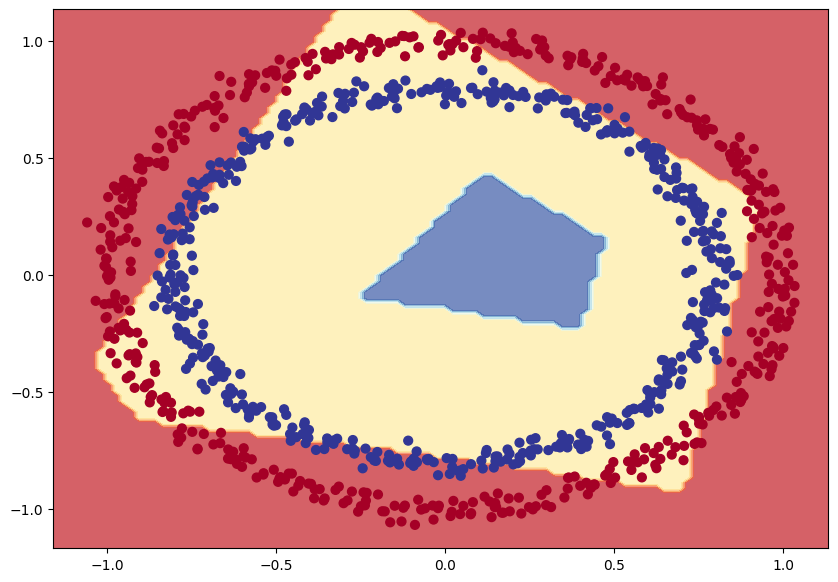

In [27]:
plot_decision_boundry(model=model_7,
                      X=X,
                      y=y)

In [28]:
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_8.fit(X, y, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5), epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.7060 - accuracy: 0.5110
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4980
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4910
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4870
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4850
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4850
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4880
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.4960
Epoch 9/1000
32/32 [==============================] - 0s 933us/step - loss: 0.6913 - accuracy: 0.5000
Epoch 10/1000
32/32 [==============================] - 0s 804us/step - loss: 0.6909 - accuracy: 0.

In [29]:
# 4. Evaluate a model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 740us/step - loss: 0.0486 - accuracy: 0.9920


[0.04856700822710991, 0.9919999837875366]

313/313 [==============================] - 0s 605us/step
Doing binary classification


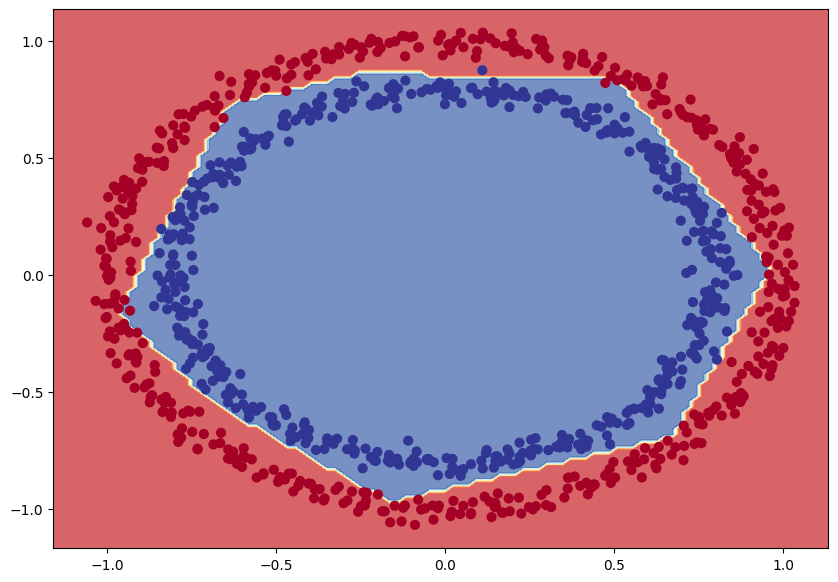

In [30]:
# Let's visualize oir incredible metrics
plot_decision_boundry(model=model_8,
                      X=X,
                      y=y)

🔑 **Note:** The combination of linear and non linear functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions, let's see them in action.

In [31]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

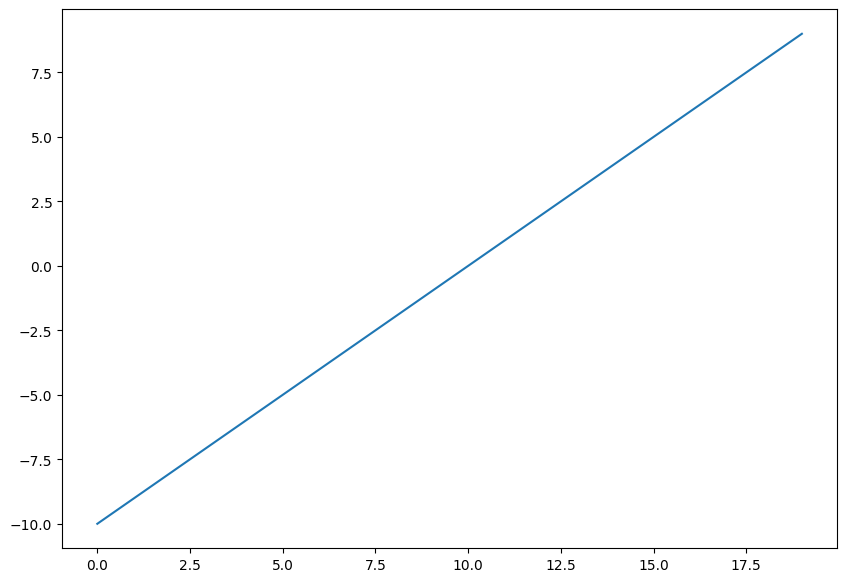

In [32]:
# Visualise our toy tensor
plt.figure(figsize=(10,7))
plt.plot(A)

**Sigmoid activation function**

In [33]:
# Let's start by replicatng sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

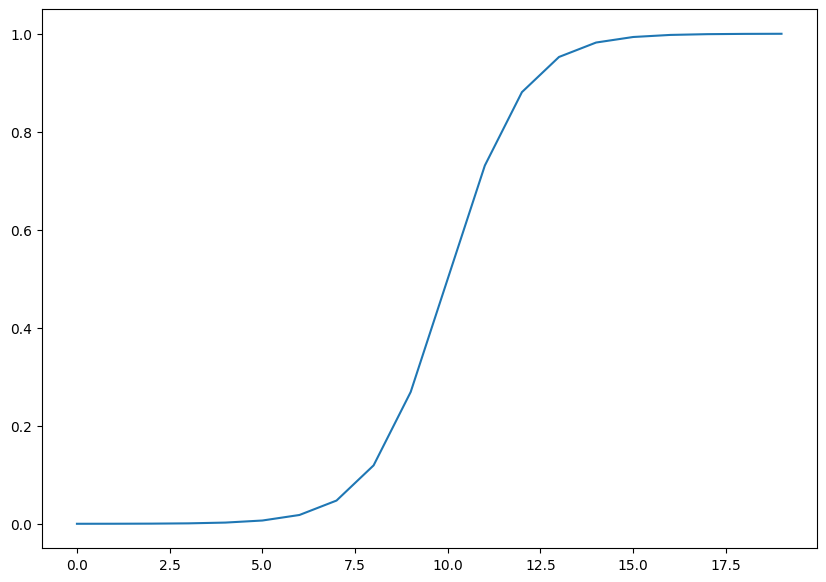

In [34]:
# Plot our toy tensor transformed by sigmoid
plt.figure(figsize=(10,7))
plt.plot(sigmoid(A))

**ReLU activation function**

In [35]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

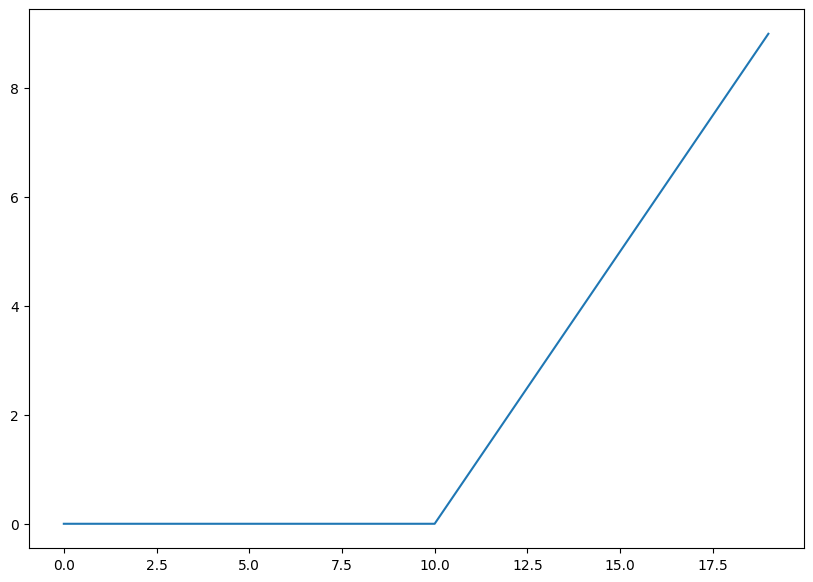

In [36]:
# Plot ReLU-modified tensor
plt.figure(figsize=(10,7))
plt.plot(relu(A))

**Linear activation function**

In [37]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

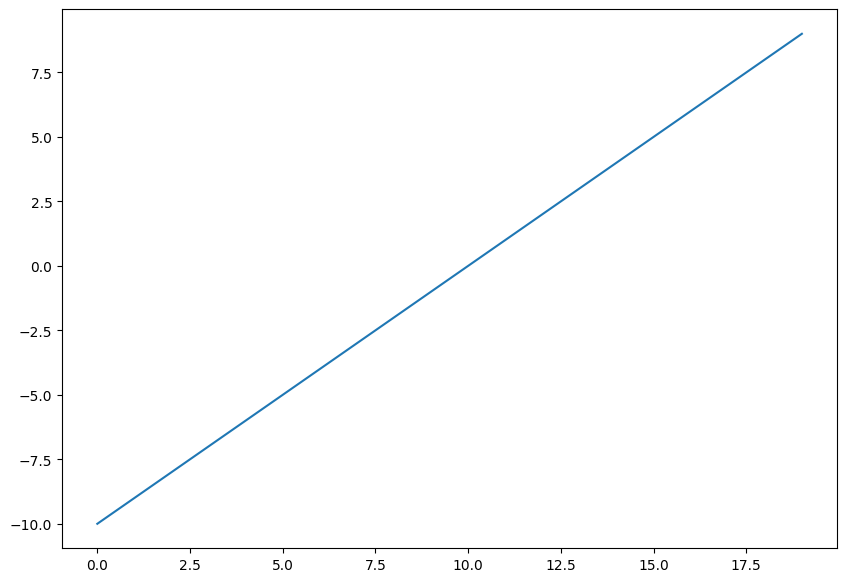

In [38]:
# Does the linear activation function change anything
plt.figure(figsize=(10,7))
plt.plot(tf.keras.activations.linear(A))

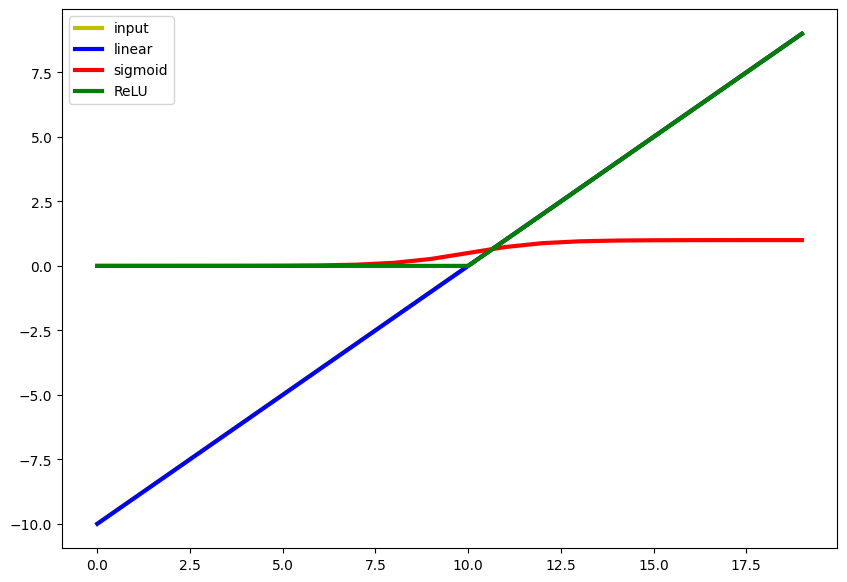

In [39]:
# Activation functions comparison
plt.figure(figsize=(10,7))
plt.plot(A, c='y', linewidth=3, label='input')
plt.plot(tf.keras.activations.linear(A), c='b', linewidth=3, label='linear')
plt.plot(sigmoid(A), c='r', linewidth=3, label='sigmoid')
plt.plot(relu(A), c='g', linewidth=3, label='ReLU')
plt.legend()

### **Evaluating and improving our classification**

So far we've been training and testing on the same dataset...

However, in ML this is basically a sin.

So let's create a tarining and test set.

In [40]:
# Check how many examples we have
len(X)

1000

In [43]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on testing data
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Let's recreate a model to fit on the training data and evaluate on testing data

tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # lr increased from 0.001
                metrics=['accuracy'])

# 3. Fit a model
history = model_9.fit(X_train, y_train, epochs=25) # decreased epochs from 100

Epoch 1/25
25/25 [==============================] - 0s 873us/step - loss: 0.6934 - accuracy: 0.5412
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5188
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5412
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6200
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.5487
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6137
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6413
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.6600
Epoch 9/25
25/25 [==============================] - 0s 914us/step - loss: 0.5952 - accuracy: 0.6775
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7113
Epoch 11/25
25/

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

In [131]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 831us/step - loss: 0.0903 - accuracy: 0.9950


[0.09034229069948196, 0.9950000047683716]

Train
313/313 [==============================] - 0s 786us/step
Doing binary classification


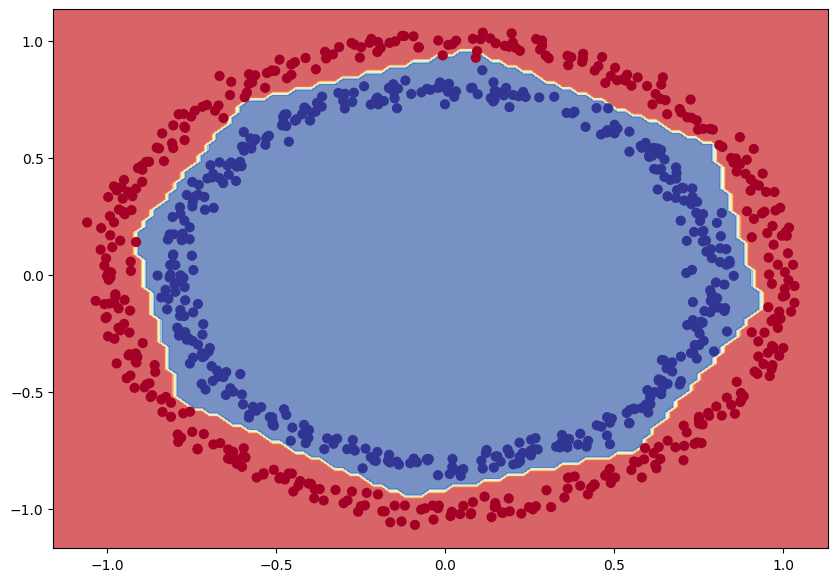

Test
313/313 [==============================] - 0s 595us/step
Doing binary classification


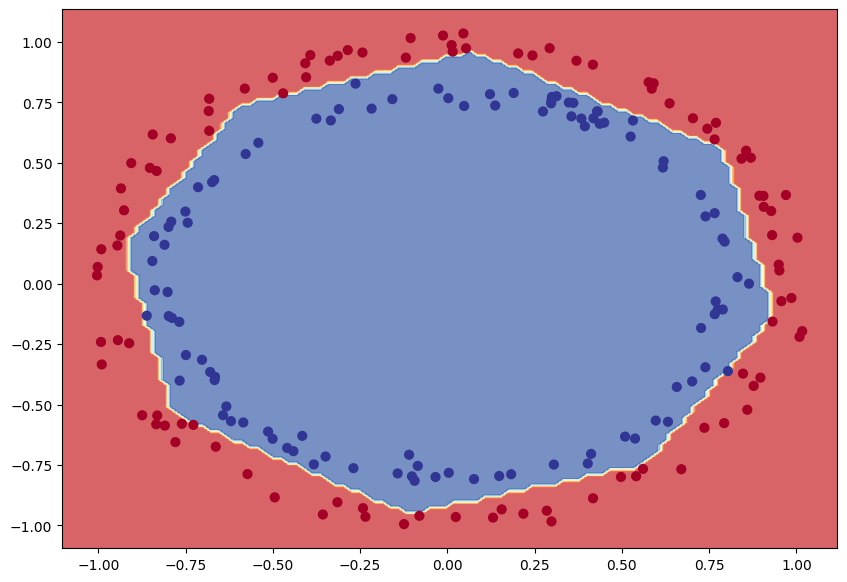

In [132]:
# Plot the decision boundaries for the training and test set

print('Train')
plot_decision_boundry(model=model_9, X=X_train, y=y_train)
plt.show();

print('Test')
plot_decision_boundry(model=model_9, X=X_test, y=y_test)
plt.show();

### **Loss the (training) curves**

In [135]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693378,0.54125
1,0.683322,0.51875
2,0.674919,0.54125
3,0.666241,0.62000
4,0.658688,0.54875
5,0.645559,0.61375
6,0.629609,0.64125
7,0.615109,0.66000
8,0.595176,0.67750
9,0.579290,0.71125


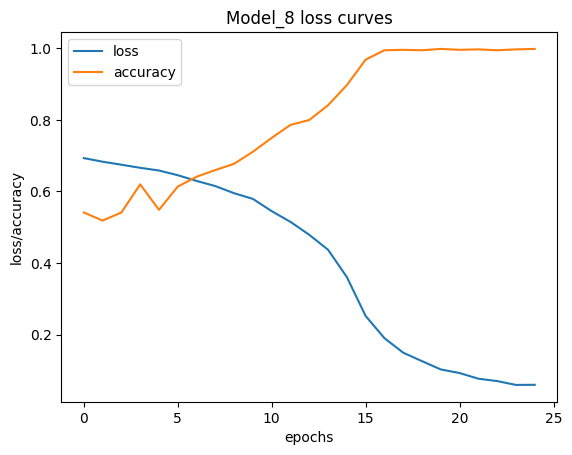

In [136]:
# Plot the loss (training) curve
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')
plt.ylabel('loss/accuracy')
plt.xlabel('epochs');

### **Finding the best learning rate**

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning **callback** - you can think of it as an extra piece of functionality, you can add to your model while it's training.
* Another model.
* Modified loss curves plot.

In [209]:
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model
model_10.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit a model (passing the lr_scheduler callback)
history = model_10.fit(X_train,
             y_train,
             epochs=100,
             callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 827us/step - loss: 0.6993 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 956us/step - loss: 0.6982 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 914us/step - loss: 0.6970 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 995us/step

<AxesSubplot: xlabel='epochs'>

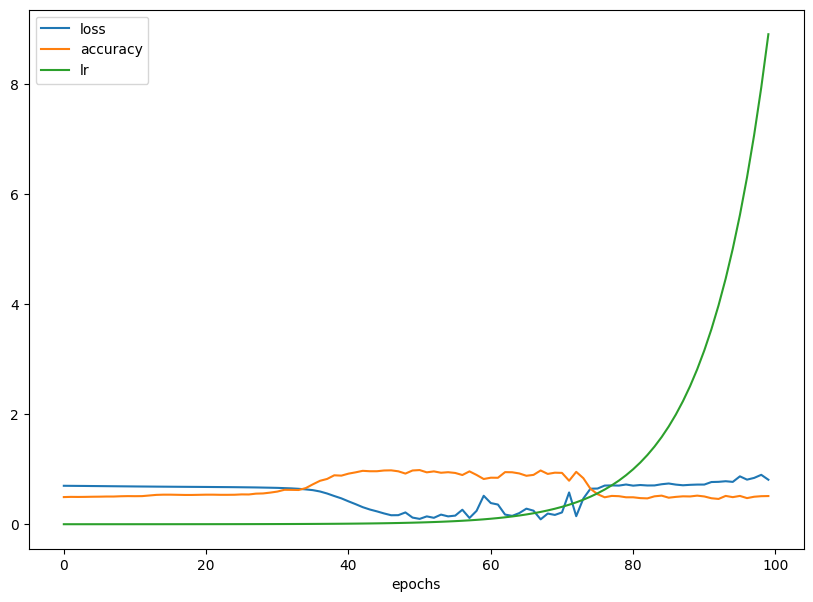

In [210]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

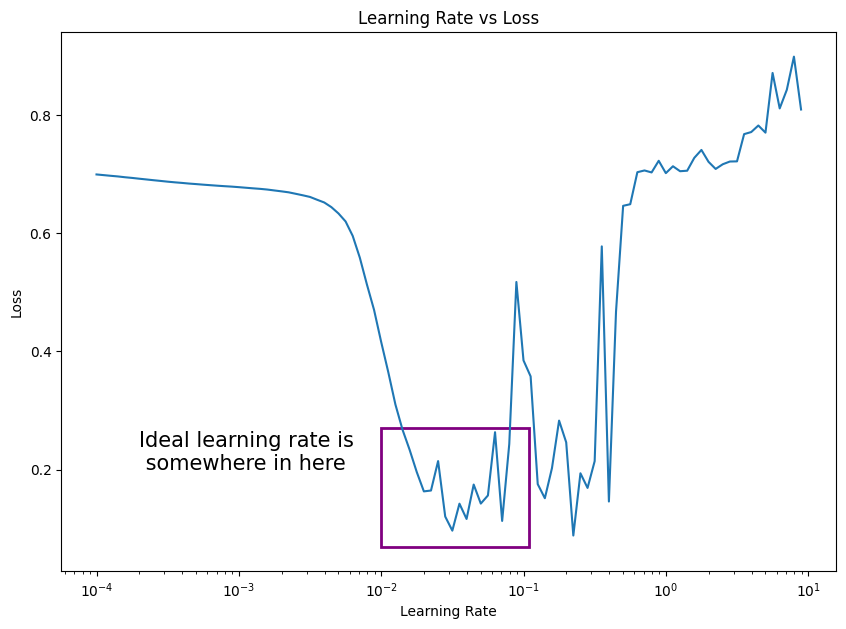

In [223]:
import matplotlib.patches as mpatches

# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # 100 different values of learning rates
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

left, bottom, width, height = (.01, .07, .1, .2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="purple",
                       linewidth=2)
plt.gca().add_patch(rect)
plt.text(.0002, .2, 'Ideal learning rate is \n somewhere in here', fontsize=15)

plt.show()

🔑 **Note:** We're looking for the learning rate value between the point with the lowest loss and the region where loss is still decreasing.

Usually optimizer's predefined learning rate value is the best (in most cases), but sometimes there may be a need to alter it.

In [212]:
# Example of other typical lerning rate values:
10e-1, 10e-2, 10e-3, 10e-4, 10e-5

(1.0, 0.1, 0.01, 0.001, 0.0001)

In [236]:
# Let's try using a higher *ideal* learning rate with the same model as before

tf.random.set_seed(42)

model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_11.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=[tf.keras.metrics.BinaryAccuracy()])

history_10 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6789 - binary_accuracy: 0.5675
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6587 - binary_accuracy: 0.6263
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6228 - binary_accuracy: 0.7950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5659 - binary_accuracy: 0.7875
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4697 - binary_accuracy: 0.8788
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3752 - binary_accuracy: 0.9350
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2695 - binary_accuracy: 0.9825
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2016 - binary_accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1594 - binary_accuracy: 0.9962
Epoch 10/20
25/25 [==============================] - 0s

In [237]:
# Evaluate model_11 on test data
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0674 - binary_accuracy: 0.9850


[0.0674145296216011, 0.9850000143051147]

Training Data
313/313 [==============================] - 0s 813us/step
Doing binary classification


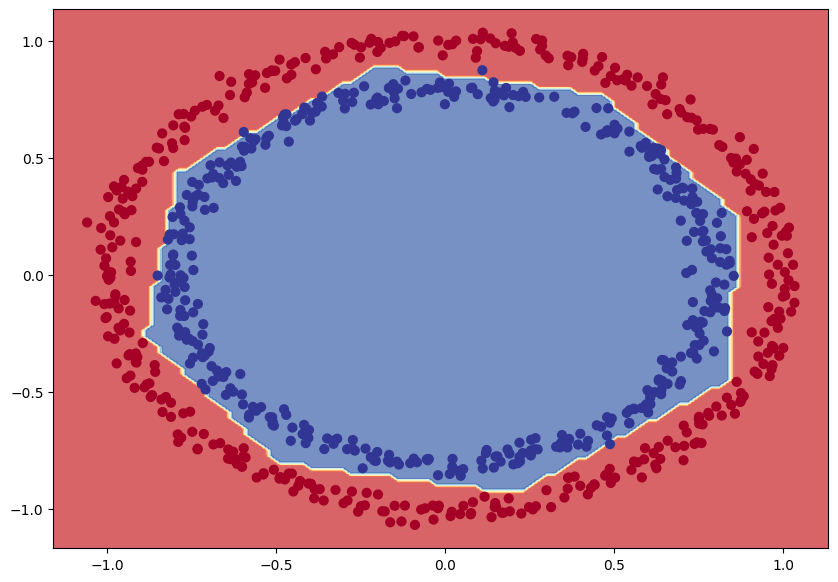

Testing Data
313/313 [==============================] - 0s 814us/step
Doing binary classification


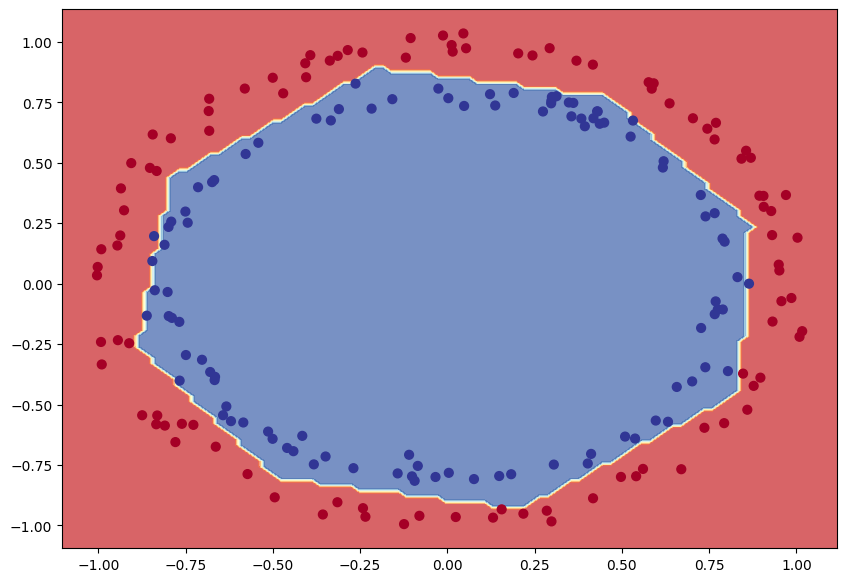

In [241]:
# Plot the decision boundries for the training and testing set
print('Training Data')
plot_decision_boundry(model_11, X_train, y_train)
plt.show()

print('Testing Data')
plot_decision_boundry(model_11, X_test, y_test)
plt.show()

### **Classification Evaluation Metrics**

Alongside visualizing our models results as much as possible, there are a hndfull of other classification evaluation method and metrics you should be familiar with:

| **Metric Name** | **Metric Formula** | **Code** | **When to use**
| :------------: | :-------:  | :-------:  | :-------:  |
| **Accuracy** | $\frac{tp+tn}{tp+tn+fp+fn}$ | tf.kreas.metrics.Accuracy() <br> or <br> sklearn.metrics.accuracy_score() | Default for Classification. Best when classes are equal in number.
| **Precision** | $\frac{tp}{tp+fp}$ | tf.kreas.metrics.Precision() <br> or <br> sklearn.metrics.precision_score() | Higher precision leads to less false positives.
| **Recall** | $\frac{tp}{tp+fn}$ | tf.kreas.metrics.Recall() <br> or <br> sklearn.metrics.recall_score() | Higher recall leads to less false negatives.
| **F1-score** | $\frac{2*(precision * recall)}{precision + recall}$ | sklearn.metrics.f1_score() | Combination of precision and recall, usually a good overall metric for a classification model.
| **Confusion matrix** | NA | Custom function <br> or <br> sklearn.metrics.confusion_matrix() | When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of cases.
| **Classification Report** | NA | sklearn.metrics.classification_report().

In [247]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f'Model loss on the test set {loss}')
print(f'Model accuracy on the test set {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0674 - binary_accuracy: 0.9850
Model loss on the test set 0.0674145296216011
Model accuracy on the test set 98.50%


How about a confusion matrix?

In [249]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1], dtype=int64)

In [250]:
# Import a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)
y_preds[:10]

7/7 [==============================] - 0s 1ms/step


array([[9.3767476e-01],
       [9.4702741e-04],
       [9.7435665e-01],
       [7.7786888e-03],
       [7.9102951e-01],
       [7.6444441e-01],
       [1.8304777e-04],
       [1.6788853e-04],
       [9.7435665e-01],
       [2.4440425e-04]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form. The standard output from sigmoid (or softmax) activation functions.

In [260]:
# Convert our prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [258]:
confusion_matrix(y_true=y_test,
                 y_pred=tf.round(y_preds))

array([[100,   0],
       [  3,  97]], dtype=int64)

How about we prettify our confusion matrix?

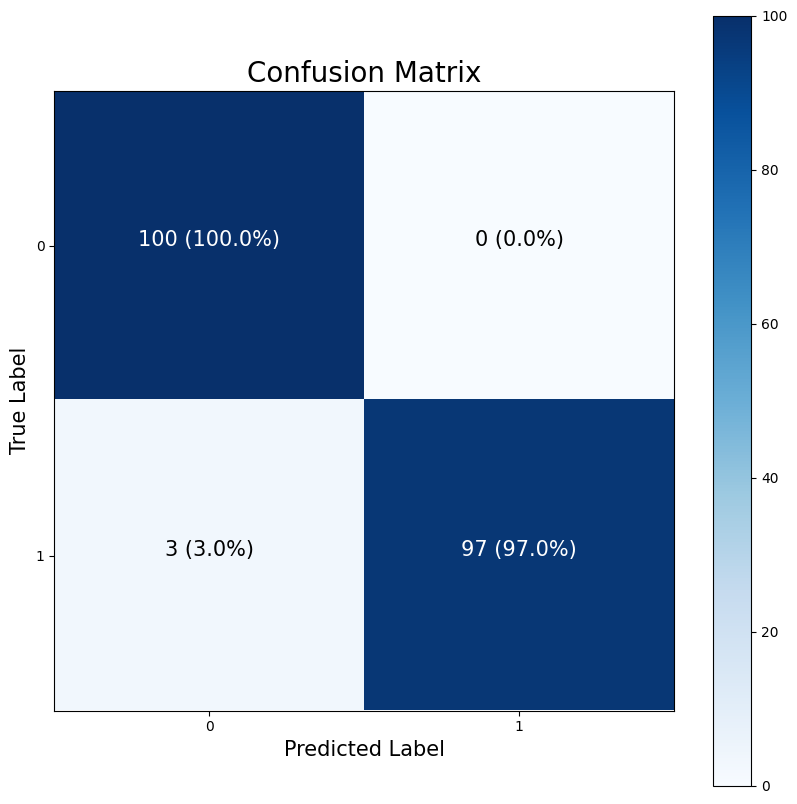

In [271]:
# The confusion matrix code below is a remix of scikit-learn's plot_confusion_matrix()

import itertools

figsize=(10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) # plot the values of a 2D matrix or array as color-coded image.
fig.colorbar(cax) # colorbar

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axis 
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

### **Working with a larger example (multiclass classification)**

When you have more than two classes as an option, is known as a **multiclass classification**.

To practise multiclass classification we're goin to build a neural network to classify images of different items of clothing.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alredy been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the firs training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Training data:


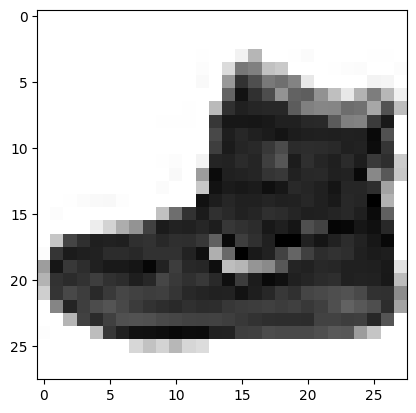

Training label: 9


In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
n = 0

print('Training data:')
plt.imshow(train_data[n], cmap=plt.cm.binary)
plt.show()

print(f'Training label: {train_labels[n]}')

In [7]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(class_names)

10

In [8]:
train_labels[n]

9

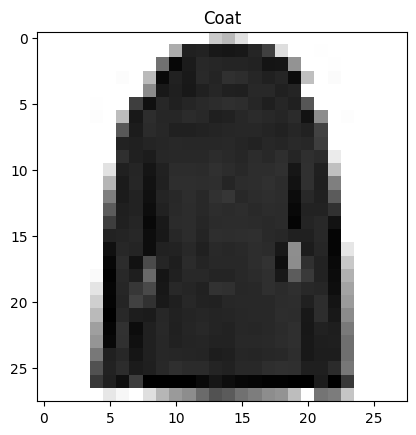

In [9]:
# Plot an example image and it's label
index_of_choice = 2000

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()

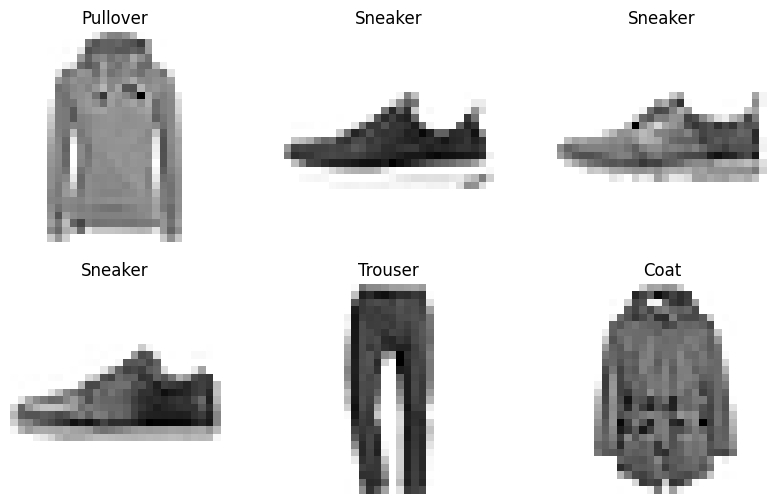

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### **Building a multiclass classification model**

For our multiclass classification model we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (1 per class)
* Output layer activation = softmax (not sigmoid)
* Loss functions = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()

In [11]:
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input shape
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # number of classes and activation function 
])

# Compile a model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss for not One-hot encoded data
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit a model
non_norm_history = model_12.fit(train_data, 
                                train_labels, 
                                epochs=10,
                                validation_data=(test_data, test_labels)) # calculates accuracy during training

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4622 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [12]:
# Check the model summary
model_12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the number in tensors they try to find patterns between 0 and 1.

In [14]:
# We can get our training and testing data between 0 and 1, by dividing by the maximum
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit a model
norm_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4726 - accuracy: 0.4379 - val_loss: 1.1630 - val_accuracy: 0.5224
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0677 - accuracy: 0.5783 - val_loss: 0.9955 - val_accuracy: 0.6190
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8961 - accuracy: 0.6788 - val_loss: 0.8548 - val_accuracy: 0.6948
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7922 - accuracy: 0.7311 - val_loss: 0.7853 - val_accuracy: 0.7277
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7292 - accuracy: 0.7432 - val_loss: 0.7257 - val_accuracy: 0.7494
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6732 - accuracy: 0.7603 - val_loss: 0.6834 - val_accuracy: 0.7612
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6403 - accuracy: 0.7700 - val_loss: 0.6625 - val_accuracy:

🔑 **Note:** Neural Networks tend to perfer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

<AxesSubplot: title={'center': 'Normalized data'}>

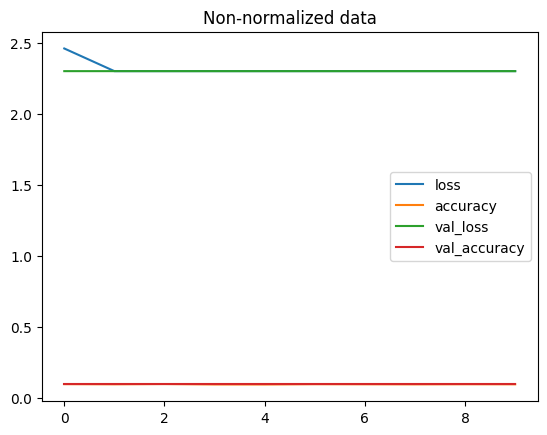

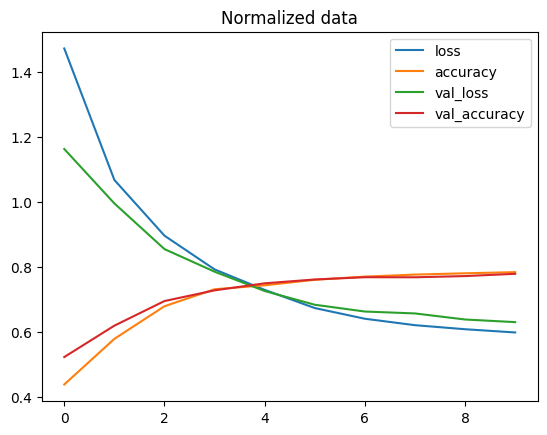

In [16]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

🔑 **Note:** The same model with even *slightly* different data can produce dramatically different results.  
So when you're comparing models, it's important to make sure you're compating them on the same criteria (e.g. same architecture but different data or same data but different architecture).

### **Finding the ideal learning rate**

In [17]:
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit a model
find_lr_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1900 - accuracy: 0.5375 - val_loss: 0.7603 - val_accuracy: 0.7296 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6860 - accuracy: 0.7496 - val_loss: 0.6895 - val_accuracy: 0.7366 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6308 - accuracy: 0.7703 - val_loss: 0.6456 - val_accuracy: 0.7576 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6042 - accuracy: 0.7821 - val_loss: 0.6091 - val_accuracy: 0.7800 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5911 - accuracy: 0.7871 - val_loss: 0.6247 - val_accuracy: 0.7735 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5814 - accuracy: 0.7897 - val_loss: 0.6506 - val_accuracy: 0.7710 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal learning rate')

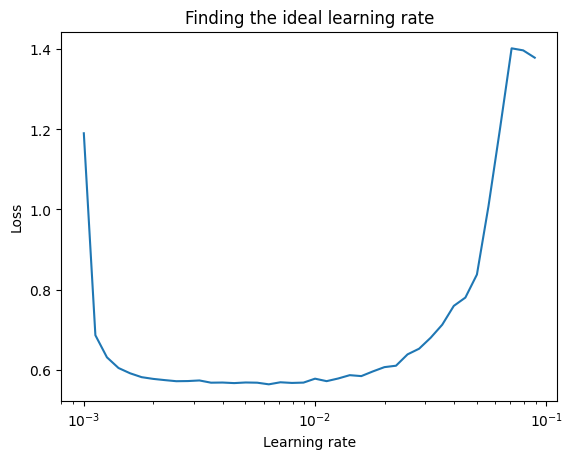

In [18]:
# Plot the learning rate dacay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [19]:
# Let's refit a model with the ideal learning rate

tf.random.set_seed(42)

model_15 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4405 - accuracy: 0.4970 - val_loss: 1.0444 - val_accuracy: 0.6284
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9363 - accuracy: 0.6456 - val_loss: 0.8934 - val_accuracy: 0.6434
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8392 - accuracy: 0.6833 - val_loss: 0.8324 - val_accuracy: 0.7023
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7699 - accuracy: 0.7285 - val_loss: 0.7790 - val_accuracy: 0.7301
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7250 - accuracy: 0.7423 - val_loss: 0.7439 - val_accuracy: 0.7416
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6957 - accuracy: 0.7501 - val_loss: 0.7192 - val_accuracy: 0.7452
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6782 - accuracy: 0.7553 - val_loss: 0.7114 - val_accuracy:

### **Evaluating our multiclass classification model**

To evaluate our multiclass classification model we could:
* Evaluate it's performance using other classification metrics (such as confusion matrix)
* Assess some its predictions (through visualizations)
* Improve its results (bu training it for longer or changing the architectues)
* Save and export it for use in an application

Let's go through the top 2:

In [20]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), color_bar=False, text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # plot the values of a 2D matrix or array as color-coded image.
    if color_bar == True:
        fig.colorbar(cax) # colorbar

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axis 
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size+5)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)

In [21]:
# Make some predictions with our model
y_probs = model_15.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 724us/step


array([[1.5015405e-03, 2.7480841e-08, 7.5359903e-06, 3.3433074e-03,
        2.7832567e-07, 5.5032605e-01, 1.8444084e-04, 1.8257096e-01,
        2.6539983e-03, 2.5941199e-01],
       [2.1691031e-03, 2.1456852e-07, 7.3161453e-01, 4.2210772e-08,
        1.4355709e-02, 4.3600737e-26, 2.5184810e-01, 0.0000000e+00,
        1.2278690e-05, 0.0000000e+00],
       [2.5831740e-03, 9.8546869e-01, 4.3279788e-04, 8.8893417e-03,
        8.3317718e-04, 4.7084228e-05, 1.6394766e-03, 5.0041473e-07,
        1.8702289e-05, 8.7010601e-05],
       [2.5837028e-03, 9.8538047e-01, 4.3600009e-04, 8.9576878e-03,
        8.4191706e-04, 4.6539149e-05, 1.6490130e-03, 4.8680369e-07,
        1.8705807e-05, 8.5436055e-05],
       [1.8397862e-01, 4.6180207e-03, 1.8058349e-01, 4.4990223e-02,
        3.8731866e-02, 3.5927481e-08, 5.3983438e-01, 3.5654710e-18,
        7.2634025e-03, 4.5498512e-16]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model wes trained on (e.g. if your model wes trained on normalized data, you'll want to make predictions on normalized data).

In [22]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.5015405e-03, 2.7480841e-08, 7.5359903e-06, 3.3433074e-03,
        2.7832567e-07, 5.5032605e-01, 1.8444084e-04, 1.8257096e-01,
        2.6539983e-03, 2.5941199e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [23]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [24]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[757,   0,   3, 108,   4,   2, 113,   0,  10,   3],
       [  2, 929,   1,  50,  11,   0,   5,   0,   1,   1],
       [ 21,   0, 370,  32, 250,   0, 323,   0,   3,   1],
       [ 35,  14,   0, 834,  40,   4,  60,   0,   1,  12],
       [  1,   0,  84,  75, 767,   0,  70,   0,   3,   0],
       [  3,   0,   0,   8,   0, 899,   0,  49,   9,  32],
       [193,   1, 141, 102, 147,   0, 405,   0,  10,   1],
       [  0,   0,   0,   1,   0,  66,   0, 892,   0,  41],
       [ 67,   1,   3,  12,   1,  21,  30,   3, 861,   1],
       [  3,   0,   0,   9,   0,  27,   0,  48,   0, 913]], dtype=int64)

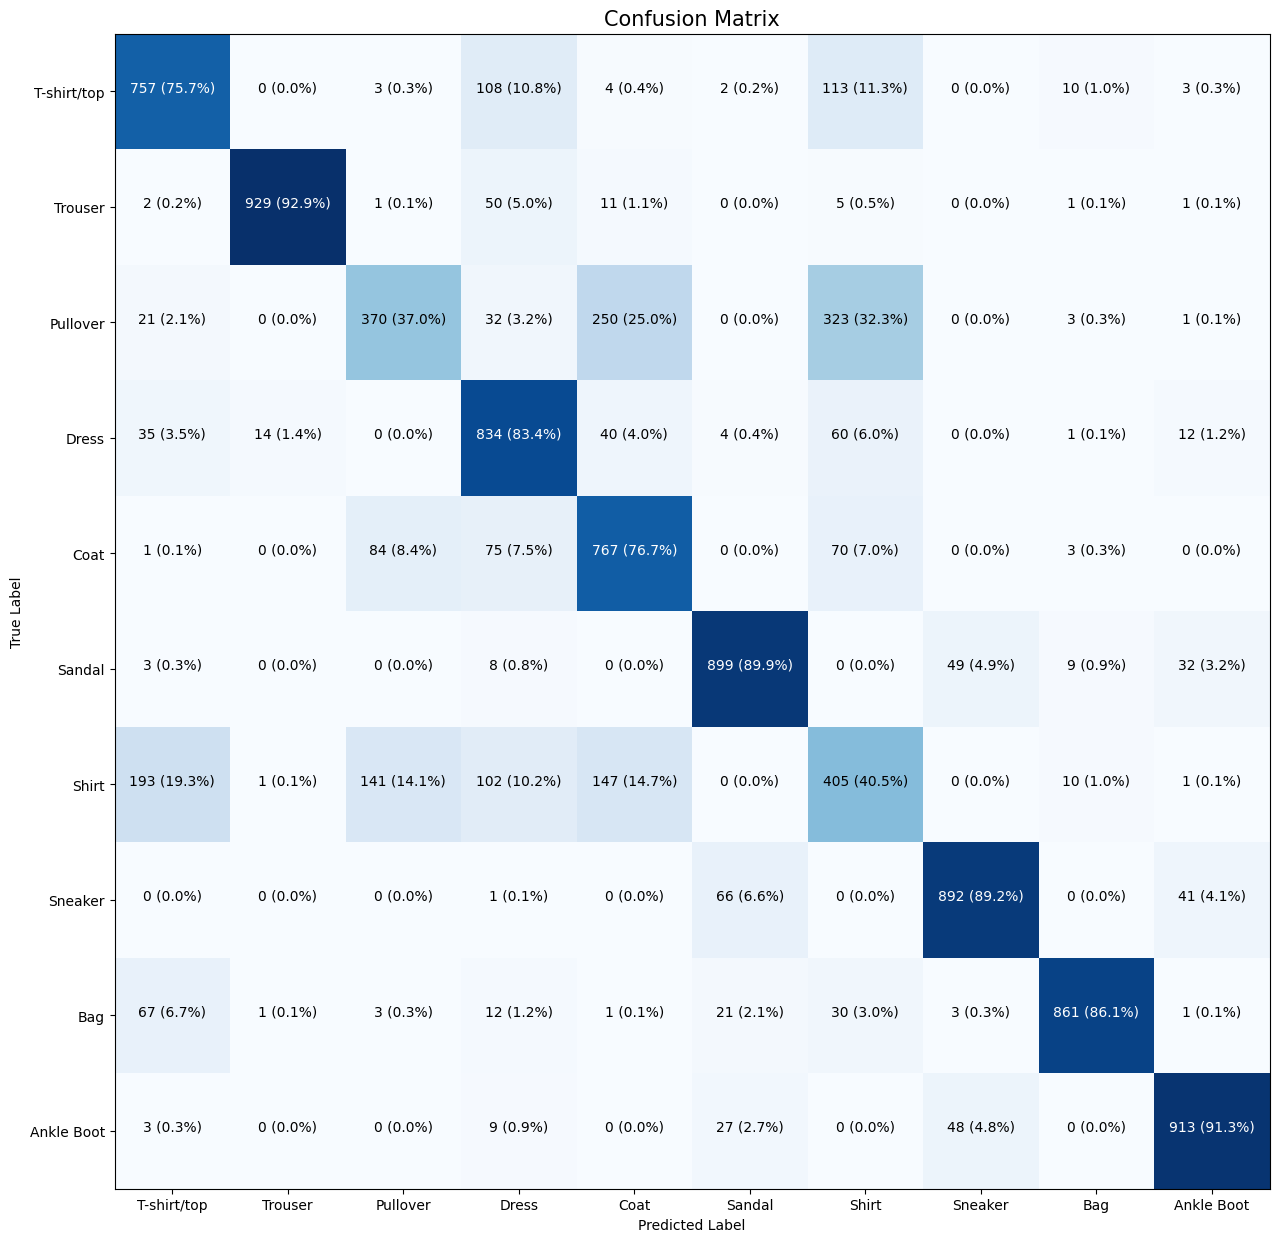

In [26]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a fruther understanding of the data in the inputs and outputs of your models.

Let's create a function for:
* Plot a random image
* Make a prediction on this image
* Label the plot with the truth label & the predicted label

In [27]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and a truth label
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create a predictions and targest
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
                                                     color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 26ms/step


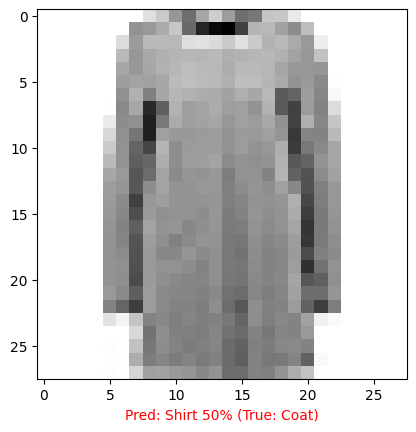

In [46]:
# Check out a random image as well as its prediciont
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

### **What patterns exactly is our model learning**

In [29]:
# Find the layers of our most recent model
model_15.layers

In [30]:
# Extract a particular layer
model_15.layers[1]

In [31]:
# Get the patterns of a layer in our network
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.6264385 , -0.61031544,  0.30290195, -0.0369583 ],
        [-0.6539365 , -0.08570321,  0.667514  ,  0.01758213],
        [-1.0405592 ,  0.9082652 ,  0.21188165,  0.07413796],
        ...,
        [ 0.40383795, -0.16874672,  0.4020581 , -0.07336669],
        [ 0.40276188, -0.22592829,  0.9707671 ,  0.05627291],
        [-0.15934527,  0.14806196,  0.5665986 ,  0.0528786 ]],
       dtype=float32),
 (784, 4))

In [32]:
# Now let's check out the bias vector
biases, biases.shape

(array([ 2.5582533 ,  3.4831164 ,  1.1279614 , -0.01577209], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in case of TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [33]:
model_15.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


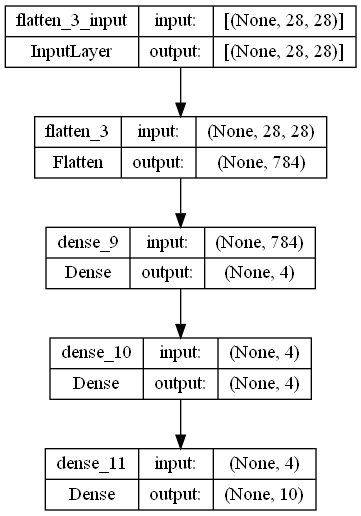

In [34]:
# Let's check out another way of viewing our deep learning models
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_15, show_shapes=True)

In [35]:
test_data_norm[0], test_data_norm[0].shape

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

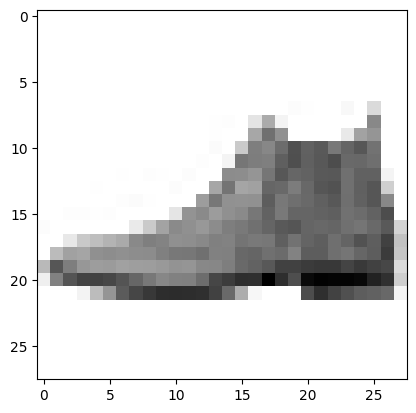

In [36]:
plt.imshow(test_data_norm[0], cmap=plt.cm.binary)
plt.show()